THIS SECTION FOLLOWS THE EXERCISES FROM THIS PLAYLIST: 
#FINANZAS Y PYTHON
https://www.youtube.com/playlist?list=PLt1juD7lYhgE9OLuL8z8rkujpOrRj4dbC

FROM YOUTUBE CHANNEL: GUILLERMO IZQUIERDO

##BTC y Prophet de Facebook, pronosticando el futuro.
https://youtu.be/Y_uQdvrBeXw

In [ ]:
import requests
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from fbprophet import Prophet
%matplotlib inline
plt.style.use('ggplot')
import numpy as np

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds         y
0    2010-08-20 -2.659260
1    2010-08-23 -2.659260
2    2010-08-26 -2.659260
3    2010-08-29 -2.813411
4    2010-09-01 -2.813411
...         ...       ...
1233 2020-10-05  9.275516
1234 2020-10-08  9.275266
1235 2020-10-11  9.332794
1236 2020-10-14  9.343843
1237 2020-10-17  9.334995

[1238 rows x 2 columns]


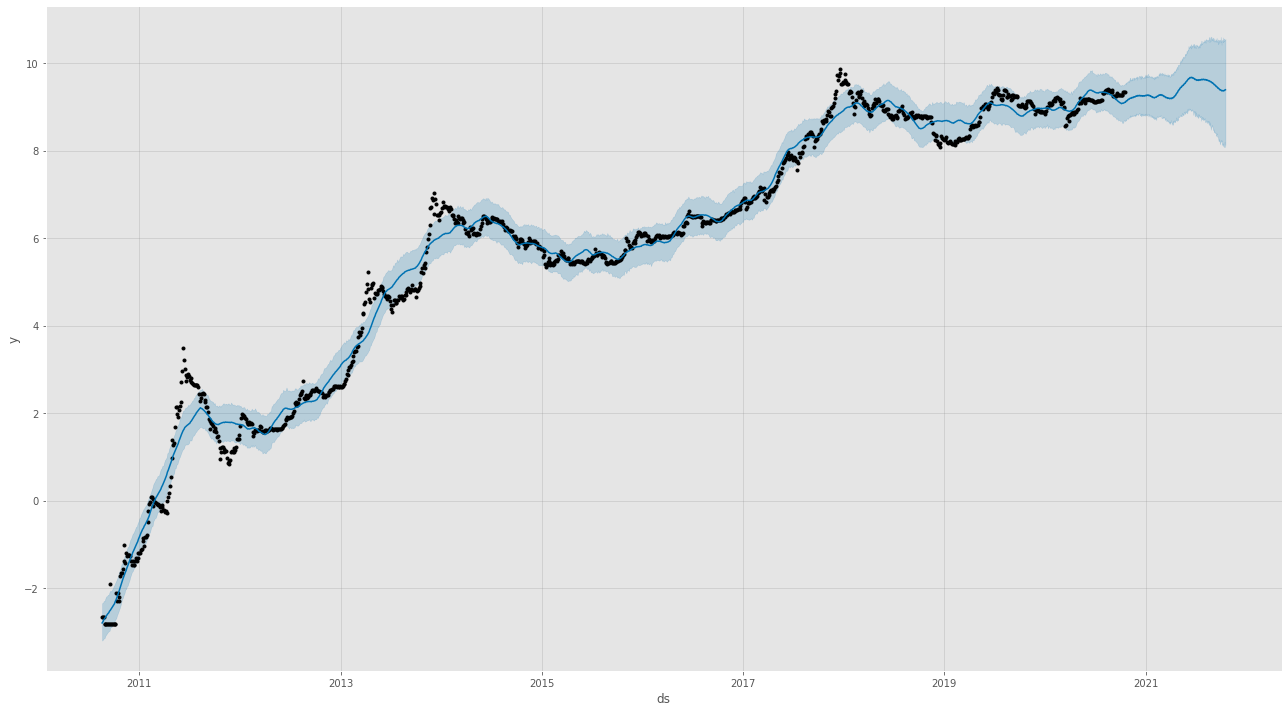

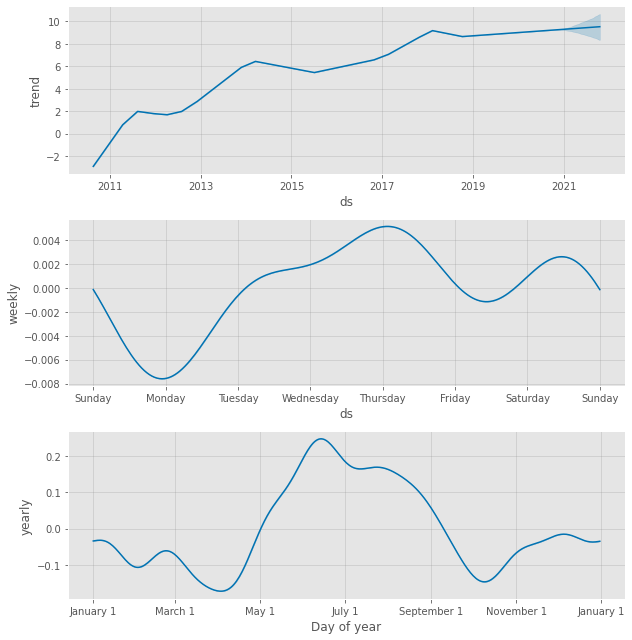

In [ ]:
#get prices from blochain info
priceraw = 'https://api.blockchain.info/charts/market-price?timespan=all&format=json'
response = requests.get(priceraw)
jasonvar = json.loads(response.content)
 
#working the request into a dataframe
prices = pd.json_normalize(jasonvar['values'])
prices['x'] = pd.to_datetime(prices['x'], unit='s')
prices = prices.set_index('x')
prices = prices[(prices.T != 0).any()]
 
prices['ds'] = prices.index
prices = prices[['ds', 'y']].reset_index()
prices = prices[['ds', 'y']]
prices['y'] = np.log(prices['y'])
 
print(prices)
#prices.plot()
 
#create a prophet model
m = Prophet()
m.fit(prices)
 
#create a dataframe for the future
future = m.make_future_dataframe(periods=365, freq='D')
#future
 
#create forecast
forecast = m.predict(future)
#forecast#[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
 
#create plots
fig1 = m.plot(forecast, figsize=(18,10))
fig2 = m.plot_components(forecast)
 
plt.show()

##Graficar Acciones e Índices en Python

In [ ]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

2017-02-01T00:00:00 2017-11-29T00:00:00
                    High           Low  ...     Volume     Adj Close
Date                                    ...                         
2017-02-01  47225.230469  46780.031250  ...  170788000  47009.511719
2017-02-02  47111.781250  46909.308594  ...  205641600  47095.070312
2017-02-03  47228.648438  46801.769531  ...  249033100  47225.101562
2017-02-07  47258.289062  46614.378906  ...  301439900  46728.949219
2017-02-08  46985.230469  46639.210938  ...  209949100  46921.710938
...                  ...           ...  ...        ...           ...
2017-11-23  48246.941406  48036.390625  ...   23136100  48136.238281
2017-11-24  48210.960938  47662.339844  ...   63562100  47941.878906
2017-11-27  47887.121094  47221.468750  ...  166142700  47275.320312
2017-11-28  47494.199219  47108.769531  ...  191636500  47229.160156
2017-11-29  47681.890625  46960.890625  ...  208686500  47622.929688

[209 rows x 6 columns]


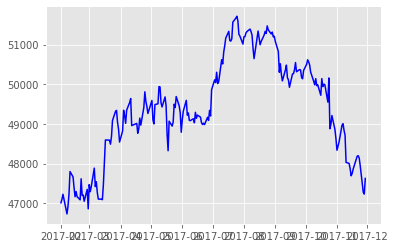

In [ ]:
#definimos una fecha de
end = datetime.datetime(2017,11,29).isoformat()
start = datetime.datetime(2017,2,1).isoformat()
print(start,end)

#definimos nuestro indice con las fechas previas
index = '^MXX'
stock = pdr.get_data_yahoo(index, start=start, end=end)
close = stock['Close']
print(stock)

plt.plot(close, color='b')
#plt.show()

##Calculando Beta con una Regresión Lineal en Python:

In [ ]:
import matplotlib
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
import numpy as np
matplotlib.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     27.77
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           3.41e-07
Time:                        18:35:04   Log-Likelihood:                 504.25
No. Observations:                 209   AIC:                            -1005.
Df Residuals:                     207   BIC:                            -997.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.543e-05      0.002      0.056      0.9

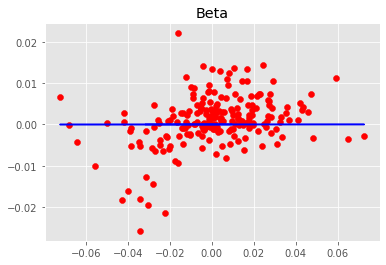

In [ ]:
#definimos fecha de analisis
end = datetime.datetime(2017,11,29).isoformat()
start = datetime.datetime(2017,2,1).isoformat()

index = pdr.get_data_yahoo('^IXIC', start=start, end=end)
index_close = index['Close']

stock = pdr.get_data_yahoo('TSLA', start=start, end=end)
stock_close = stock['Close']

#calculamos los retornos diarios
index = index_close.pct_change().dropna().values
stock = stock_close.pct_change().dropna().values

#definimos el modelo usando stats models
x = sm.add_constant(index)
model = sm.OLS(stock,x)
results = model.fit()
beta = results.params[1]
alpha = results.params[0]
vector = stock * beta * alpha

#validamos el modelo usando polifit de numpy
z = np.polyfit(index, stock, 1)

#imprimimos resultados
print(results.summary())
print(z)
print('la beta del modelo es: ', beta)

#graficamos el modelo de regresion por OLS
plt.figure()
plt.scatter(stock, index, color='r')
plt.plot(stock, vector, color='b')
plt.title('Beta')
plt.show()

Precios y su Distribución Lognormal en Python:

Retornos de una acción y su Distribución Normal en Python

Modelo Black-Scholes en Python:

sirve para estimar el precio de una opcion europea caal o put. 
llamada la ecuacion mas importante de las finanzas modernas

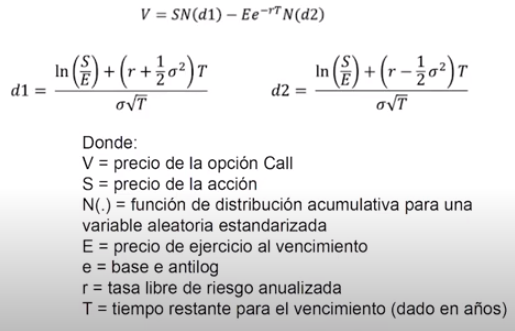

Volatilidad Implicita en Python:

Volatilidad Implicita en Python:

Optimización de Portafolios en Python:

PCA - Replicando Indices Financieros:

THIS SECTION FOLLOWS THE EXERCISES FROM THIS PLAYLIST: 
#ANALISIS TECNICO CON PYTHON
https://www.youtube.com/playlist?list=PLt1juD7lYhgHz7DX0efDnm6mXR12RiePg

FROM YOUTUBE CHANNEL: GUILLERMO IZQUIERDO

In [ ]:
pip install --upgrade mplfinance

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

from matplotlib import gridspec
import mplfinance as mpf
from mplfinance import original_flavor

In [ ]:
enddate = date.datetime(2020,10,1)
startdate = date.datetime(2019,1,1)
tick = '^MXX'
#tick = 'AMZN'
ipc= pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [ ]:
print(ipc.head())
%matplotlib inline
ipc.Close.plot()

##Media Móvil Simple - Media Móvil Exponencial

In [ ]:
def MA(df, n):
  MA = pd.Series(pd.Series.rolling(df['Close'], n).mean(), name = 'MA_' + str(n))
  df = df.join(MA)
  return df

def EMA(df, n):
  EMA = pd.Series(pd.Series.ewm(df['Close'], span = n, min_periods = n-1, adjust = False).mean(), name = 'EMA_' + str(n))
  df = df.join(EMA)
  return df

In [ ]:
ma_50 = MA(ipc, 50)
ma_200 = MA(ma_50, 200)
print(ma_200)
df = ma_200[['Close', 'MA_50', 'MA_200']]
df.plot(figsize = (16,8))

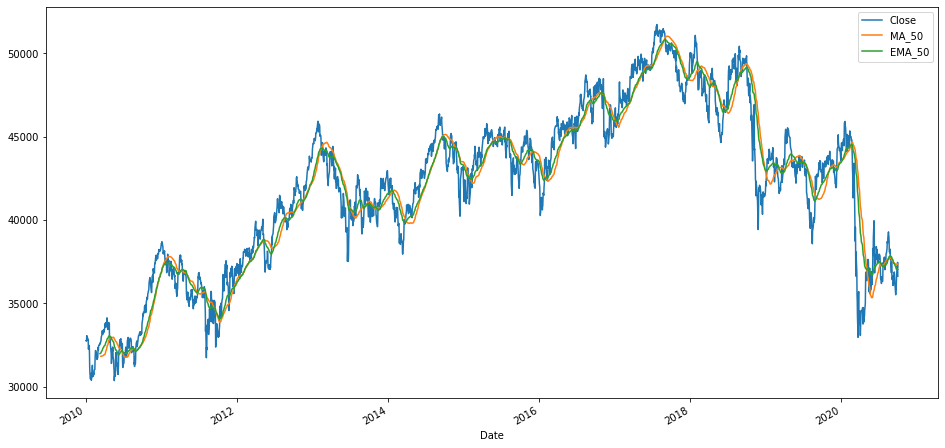

In [ ]:
df = EMA(ipc, 50)
df2= MA(df, 50)
df2 = df2[['Close', 'MA_50', 'EMA_50']]
df2.plot(figsize = (16,8))

##Momentum - Rate of Change (ROC)

In [ ]:
def MOM(df, n):
  M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))
  df = df.join(M)
  return df

def ROC(df, n):
  M = df['Close'].diff(n-1)
  N = df['Close'].shift(n-1)
  ROC = pd.Series(M / N, name = 'ROC_' + str(n))
  df = df.join(ROC)
  return df

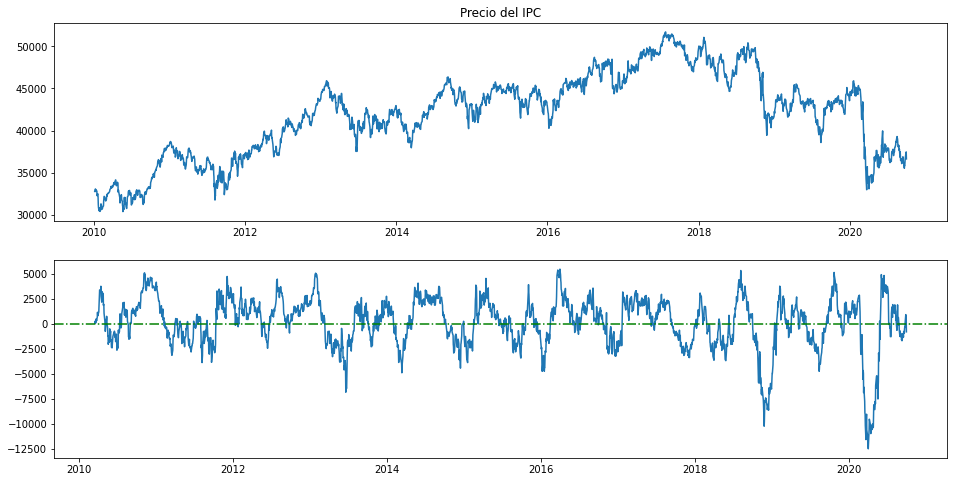

In [ ]:
df = MOM(ipc, 50)

fig = plt.figure(figsize = (16,8))
plt.subplot(2,1,1)
plt.plot(df.Close)
plt.title('Precio del IPC')
plt.subplot(2,1,2)
plt.plot(df.Momentum_50)
plt.axhline(y=0, color='green', linestyle='-.')
plt.show()

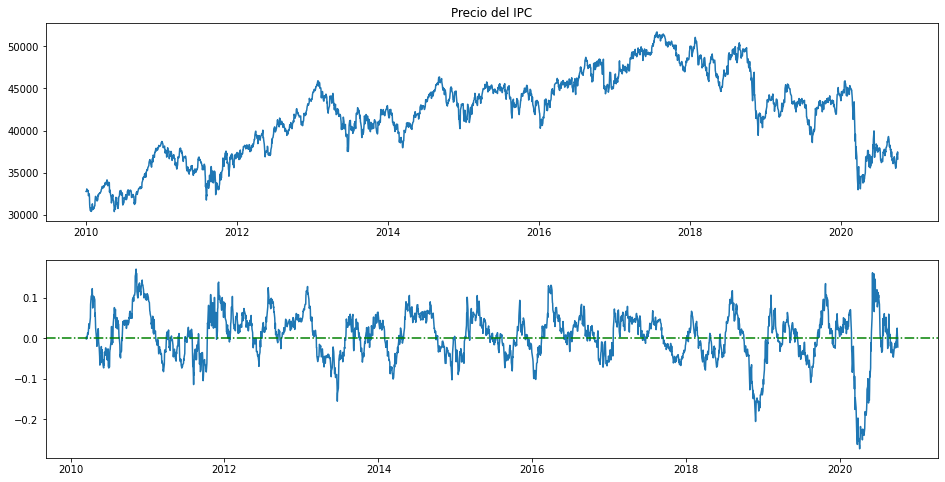

In [ ]:
df2 = ROC(ipc, 50)

fig = plt.figure(figsize = (16,8))
plt.subplot(2,1,1)
plt.plot(df2.Close)
plt.title('Precio del IPC')
plt.subplot(2,1,2)
plt.plot(df2.ROC_50)
plt.axhline(y=0, color='green', linestyle='-.')
plt.show()

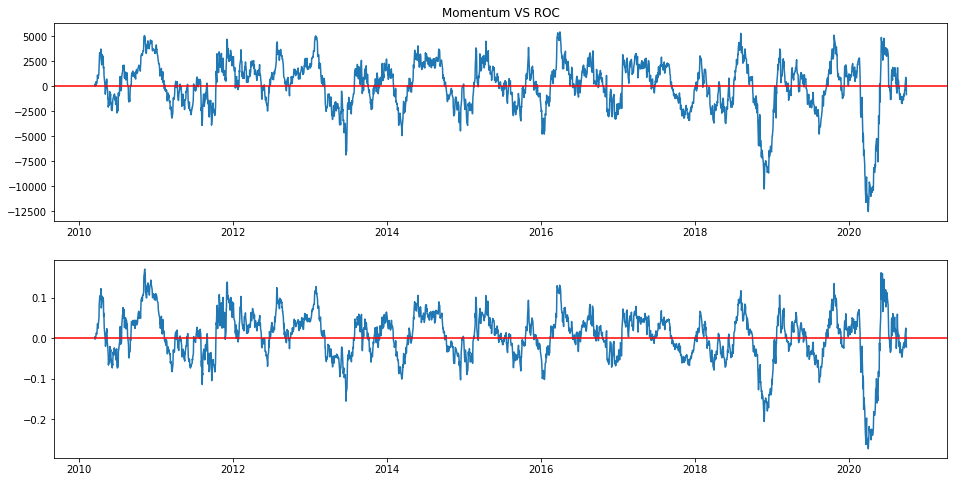

In [ ]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2,1,1)
plt.plot(df.Momentum_50)
plt.axhline(y=0, color='r')
plt.title('Momentum VS ROC')
plt.subplot(2,1,2)
plt.plot(df2.ROC_50)
plt.axhline(y=0, color='r')
plt.show()

##Bandas de Bollinger

In [ ]:
def BBANDS(df, n):
  MA = pd.Series(pd.Series.rolling(df['Close'], n).mean())
  MSD = pd.Series(pd.Series.rolling(df['Close'], n).std())
  b1 = MA + (MSD*2)
  B1 = pd.Series(b1, name = 'BollingerB_' + str(n))
  df = df.join(B1)
  b2 = MA - (MSD*2)
  B2 = pd.Series(b2, name = 'Bollinger%b_' + str(n))
  df = df.join(B2)
  return df

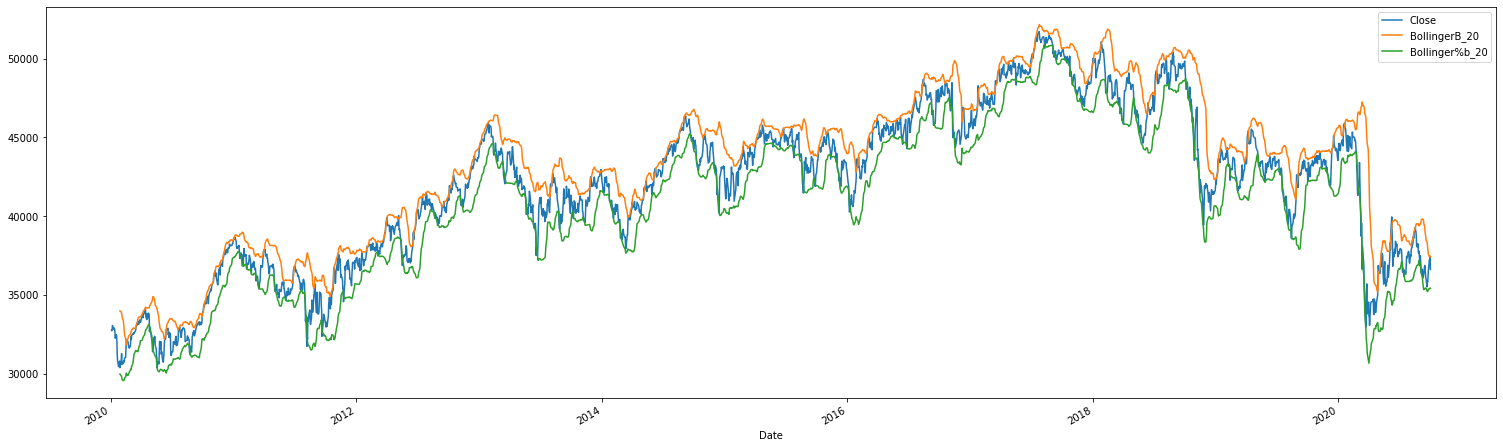

In [ ]:
df = BBANDS(ipc, 20)
df2 = df[['Close', 'BollingerB_20', 'Bollinger%b_20']]
df2.plot(figsize = (26,8))

##Gráficos de Velas

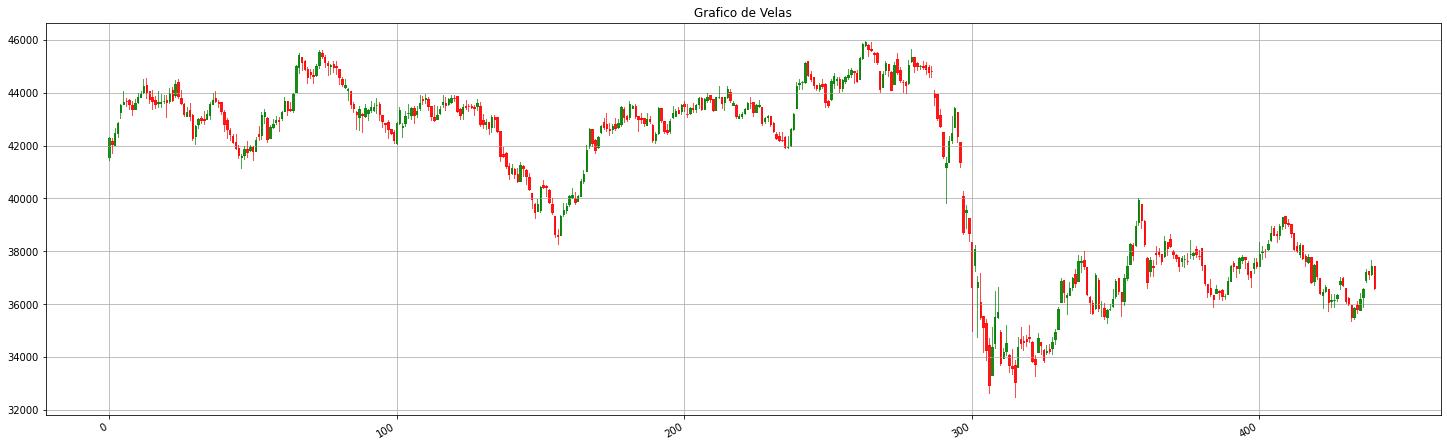

In [ ]:
fig = plt.figure(figsize=(25,8))
ax1 = plt.subplot()
original_flavor.candlestick2_ochl(ax1,ipc.Open, ipc.Close, ipc.High, ipc.Low, width=0.5, colorup='green', colordown='r', alpha=0.7)
plt.grid(True)
fig.autofmt_xdate()
plt.title('Grafico de Velas')
plt.show()

##ATR - Average True Range

In [ ]:
def ATR(df, n):
  df = df.reset_index()
  i = 0
  TR_l = [0]
  while i < df.index[-1]:
    TR = max(df.at[i+1, 'High'], df.at[i, 'Close']) - min(df.at[i+1, 'Low'], df.at[i, 'Close'])
    TR_l.append(TR)
    i = i+1
  TR_s = pd.Series(TR_l)
  ATR = pd.Series(pd.Series.ewm(TR_s, span = n, min_periods = n).mean(), name = 'ATR_' + str(n))
  df = df.join(ATR)
  df.set_index('Date', inplace=True)
  return df

In [ ]:
df = ATR(ipc, 50)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,ATR_50
Date,,,,,,,
2020-09-18,3037.800049,2905.540039,3031.739990,2954.909912,8892600,2954.909912,107.247139
2020-09-21,2962.000000,2871.000000,2906.500000,2960.469971,6117900,2960.469971,106.609997
2020-09-22,3133.989990,3000.199951,3033.840088,3128.989990,6948800,3128.989990,109.233919
2020-09-23,3127.000000,2992.379883,3120.429932,2999.860107,5652700,2999.860107,110.307495
2020-09-24,3069.300049,2965.000000,2977.790039,3019.790039,5529400,3019.790039,110.071909
2020-09-25,3101.540039,2999.000000,3054.860107,3095.129883,4615200,3095.129883,109.776542
2020-09-28,3175.040039,3117.169922,3148.850098,3174.050049,4224200,3174.050049,108.605311
2020-09-29,3188.260010,3132.540039,3175.389893,3144.879883,3495800,3144.879883,106.531376
2020-09-30,3212.879883,3133.989990,3141.139893,3148.729980,4883400,3148.729980,105.447396


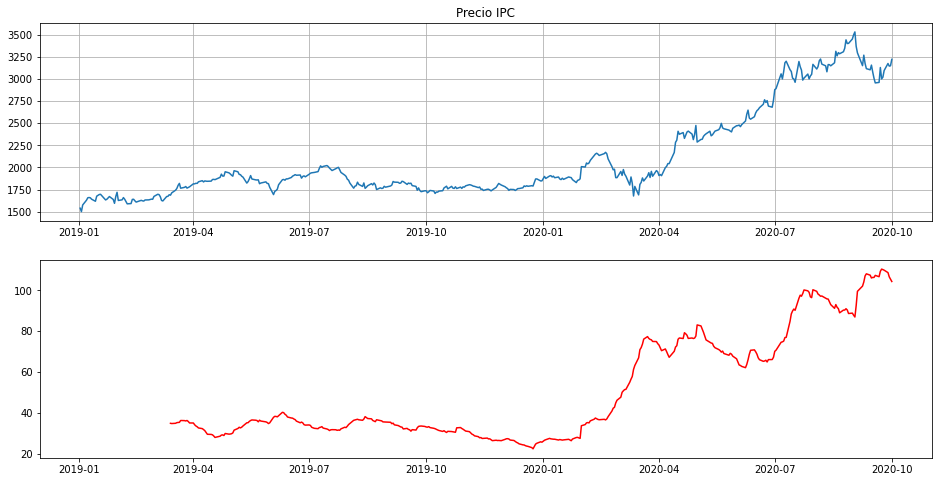

In [ ]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(211)
plt.plot(df.Close)
#candlestick2_ochl(ax1,ipc.Open, ipc.Close, ipc.High, ipc.Low, width=0.5, colorup='green', colordown='r', alpha=0.75)
plt.grid(True)
plt.title('Precio IPC')
ax2 = plt.subplot(212, sharex = ax1)
plt.plot(df.ATR_50, color='r')
plt.show()

##Oscilador Estocástico

In [ ]:
#estocastico del precio actual
def STOK(df):
  SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SOk')
  df = df.join(SOk)
  return df
#medias moviles (exponenciales) del estocastico
def STO(df, nK, nD, nS=1):
  SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min()) / (df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SOk' + str(nK))
  SOd = pd.Series(SOk.ewm(ignore_na=False, span=nD, min_periods=nD-1, adjust=True).mean(), name = 'SOd' + str(nD))
  SOk = SOk.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()
  SOd = SOd.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()
  df = df.join(SOk)
  df = df.join(SOd)
  return df
#medias moviles simples
def STOs(df, nK, nD, nS=1):
  SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min()) / (df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SOk' + str(nK))
  SOd = pd.Series(SOk.rolling(window=nD, center=False).mean(), name = 'SOd' + str(nD))
  SOk = SOk.rolling(window=nS, center =False).mean()
  SOd = SOd.rolling(window=nS, center =False).mean()
  df = df.join(SOk)
  df = df.join(SOd)
  return df

In [ ]:
df = STOK(ipc)
df = df[['Close', 'SOk']]

fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(211)
plt.plot(df.Close)
#candlestick2_ochl(ax1,ipc.Open, ipc.Close, ipc.High, ipc.Low, width=0.5, colorup='green', colordown='r', alpha=0.75)
plt.grid(True)
plt.title('Precio IPC')
ax2 = plt.subplot(212, sharex = ax1)
plt.plot(df.SOk, color='r')
plt.show()

In [ ]:
df = STO(ipc, 14, 3)
df.tail()
df = df[['Close', 'SOk14', 'SOd3']]

fig = plt.figure(figsize=(22,8))
ax1 = plt.subplot(211)
plt.plot(df.Close)
#candlestick2_ochl(ax1,ipc.Open, ipc.Close, ipc.High, ipc.Low, width=0.5, colorup='green', colordown='r', alpha=0.75)
plt.grid(True)
plt.title('Precio IPC')
ax2 = plt.subplot(212, sharex = ax1)
plt.plot(df.SOk14, color='r')
plt.plot(df.SOd3, color='g')
plt.axhline(y=0.8, color='k', linestyle = '--')
plt.axhline(y=0.2, color='k', linestyle = '--')
plt.show()

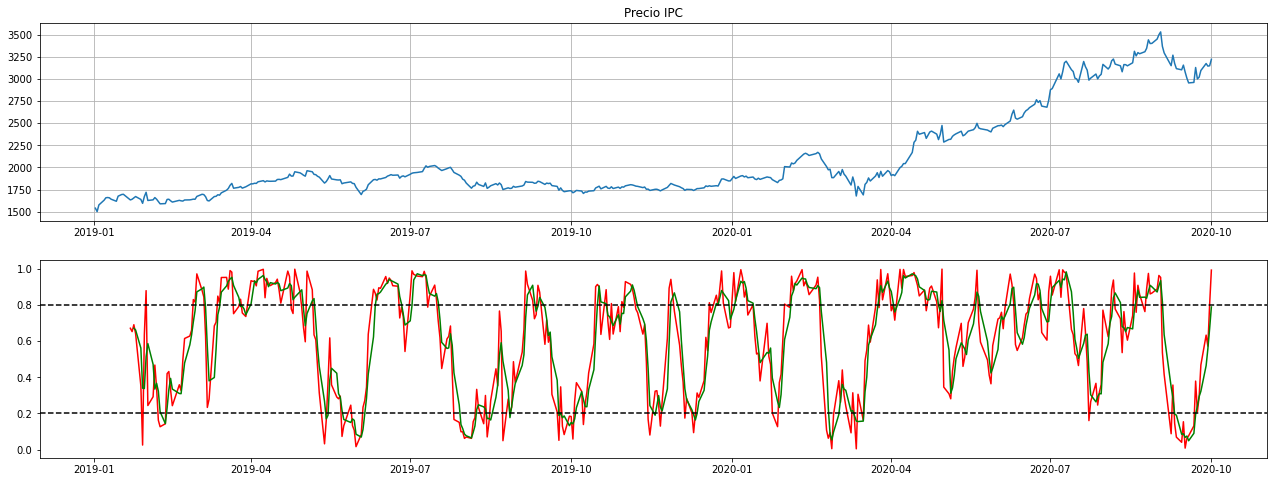

In [ ]:
df = STOs(ipc,14,3)
df.tail()

fig = plt.figure(figsize=(22,8))
ax1 = plt.subplot(211)
plt.plot(df.Close)
#candlestick2_ochl(ax1,ipc.Open, ipc.Close, ipc.High, ipc.Low, width=0.5, colorup='green', colordown='r', alpha=0.75)
plt.grid(True)
plt.title('Precio IPC')
ax2 = plt.subplot(212, sharex = ax1)
plt.plot(df.SOk14, color='r')
plt.plot(df.SOd3, color='g')
plt.axhline(y=0.8, color='k', linestyle = '--')
plt.axhline(y=0.2, color='k', linestyle = '--')
plt.show()

##TRIX - Triple Exponential Average

In [ ]:
def TRIX(df, n):
  EX1 = pd.Series.ewm(df['Close'], span = n, min_periods = n-1).mean()
  EX2 = pd.Series.ewm(EX1, span = n, min_periods = n-1).mean()
  EX3 = pd.Series.ewm(EX2, span = n, min_periods = n-1).mean()
  i = 0
  ROC_l = [0]
  df = df.reset_index()
  while i + 1 <= df.index[-1]:
    ROC = (EX3[i+1] - EX3[i]) / EX3[i]
    ROC_l.append(ROC)
    i = i+1
  Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))
  df = df.join(Trix)
  return df

No handles with labels found to put in legend.


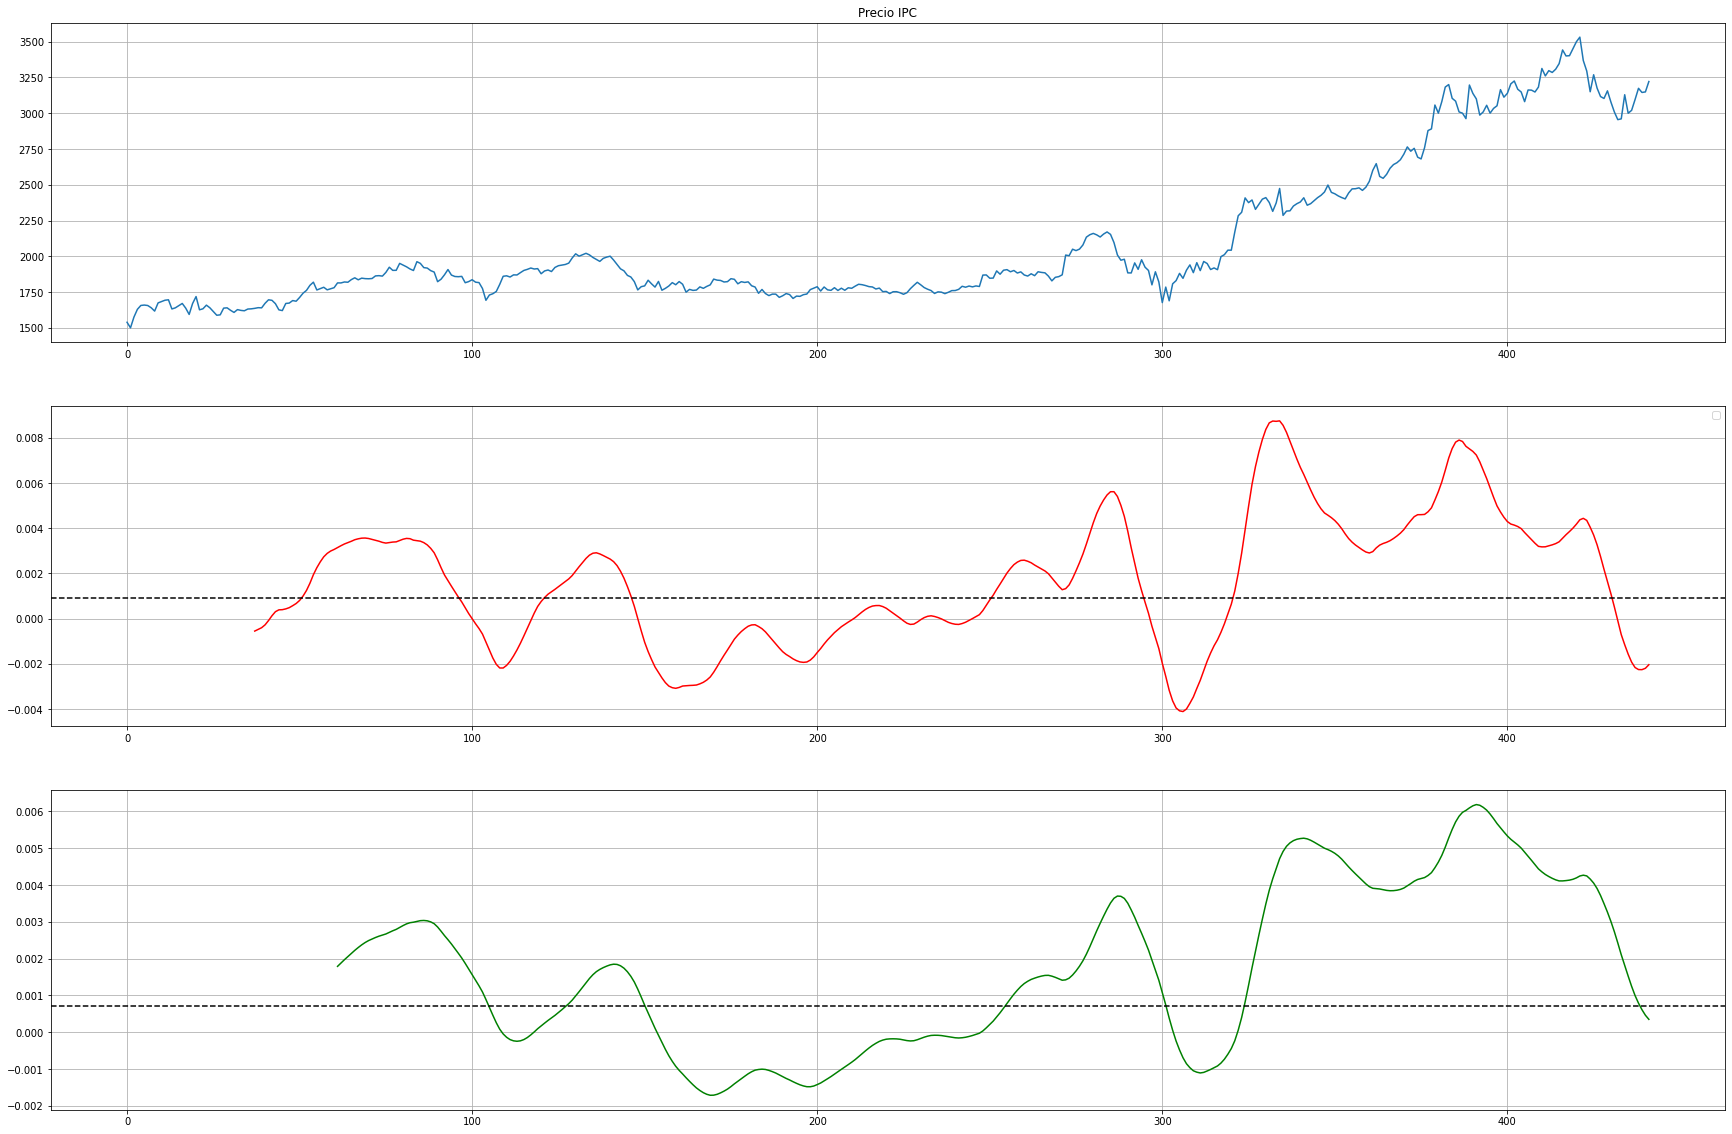

In [ ]:
df = TRIX(ipc, 14)
df = TRIX(df, 22)

fig = plt.figure(figsize=(30,20))
ax1 = plt.subplot(311)
plt.plot(df.Close)
plt.grid(True)
plt.title('Precio IPC')
ax2 = plt.subplot(312, sharex = ax1)
plt.plot(df.Trix_14, color='r')
plt.axhline(y=0.0009, color='k', linestyle='--')
plt.grid(True)
plt.legend()
ax3 = plt.subplot(313, sharex=ax1)
plt.plot(df.Trix_22, color='g')
plt.axhline(y=0.0007, color='k', linestyle='--')
plt.grid(True)
plt.show()

##Average Directional Index - ADX

In [ ]:
def ADX(df, n, n_ADX):
  i = 0
  UpI = []
  DoI = []
  df = df.reset_index()
  while i + 1 <= df.index[-1]:
    UpMove = df.at[i+1,'High'] - df.at[i,'High']
    DoMove = df.at[i,'Low'] - df.at[i+1,'Low']
    if UpMove > DoMove and UpMove > 0:
      UpD = UpMove
    else: UpD = 0
    UpI.append(UpD)
    if DoMove > UpMove and DoMove > 0:
      DoD = DoMove
    else: DoD = 0
    DoI.append(DoD)
    i = i + 1
  i = 0
  TR_l = [0]
  while i < df.index[-1]:
    TR = max(df.at[i+1,'High'], df.at[i,'Close']) - min(df.at[i+1,'Low'], df.at[i,'Close'])
    TR_l.append(TR)
    i = i +1
  TR_s = pd.Series(TR_l)
  ATR = pd.Series(pd.Series.ewm(TR_s, span = n, min_periods=n).mean())
  UpI = pd.Series(UpI)
  DoI = pd.Series(DoI)
  PosDI = pd.Series(pd.Series.ewm(UpI, span = n, min_periods = n-1).mean() / ATR, name = 'pDI')
  NegDI = pd.Series(pd.Series.ewm(DoI, span = n, min_periods = n-1).mean() / ATR, name = 'nDI')
  ADX = pd.Series(pd.Series.ewm(abs(PosDI - NegDI) / (PosDI + NegDI), span = n_ADX, min_periods = n_ADX - 1).mean(), name = 'ADX_' + str(n) + '_' + str(n_ADX))
  df = df.join(ADX)
  df = df.join(PosDI)
  df = df.join(NegDI)
  df.set_index('Date', inplace=True)
  return df

No handles with labels found to put in legend.


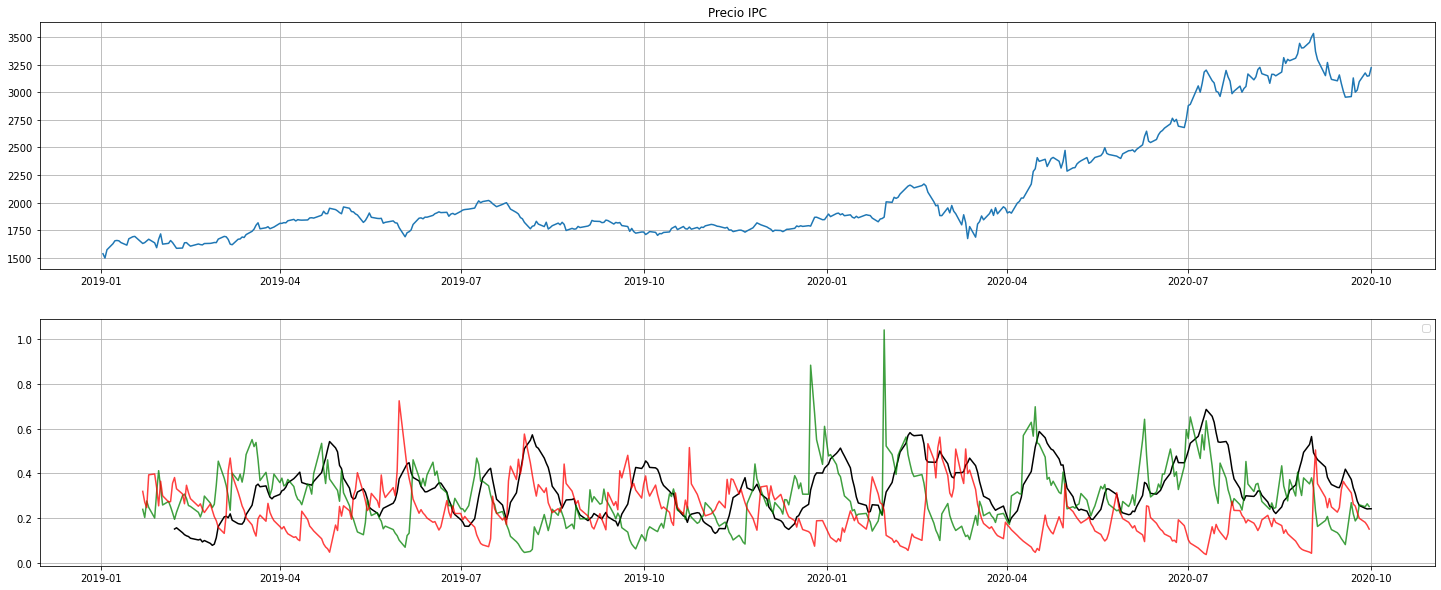

In [ ]:
df = ADX(ipc, 14, 14)

fig = plt.figure(figsize=(25,10))
ax1 = plt.subplot(211)
plt.plot(df.Close)
plt.grid(True)
plt.title('Precio IPC')
ax2 = plt.subplot(212, sharex = ax1)
plt.plot(df.ADX_14_14, color='k')
plt.plot(df.pDI, color='g', alpha=0.75)
plt.plot(df.nDI, color='r', alpha=0.75)
plt.legend()
plt.grid(True)
plt.show()

## MACD - Moving Average Convergence Divergence

In [ ]:
def MACD(df, n_fast, n_slow):
  EMAfast = pd.Series(pd.Series.ewm(df['Close'], span = n_fast, min_periods = n_slow - 1).mean())
  EMAslow = pd.Series(pd.Series.ewm(df['Close'], span = n_slow, min_periods = n_slow - 1).mean())
  MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))
  MACDsign = pd.Series(pd.Series.ewm(MACD, span=9,min_periods=8).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
  MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))
  df = df.join(MACD)
  df = df.join(MACDsign)
  df = df.join(MACDdiff)
  return df

No handles with labels found to put in legend.


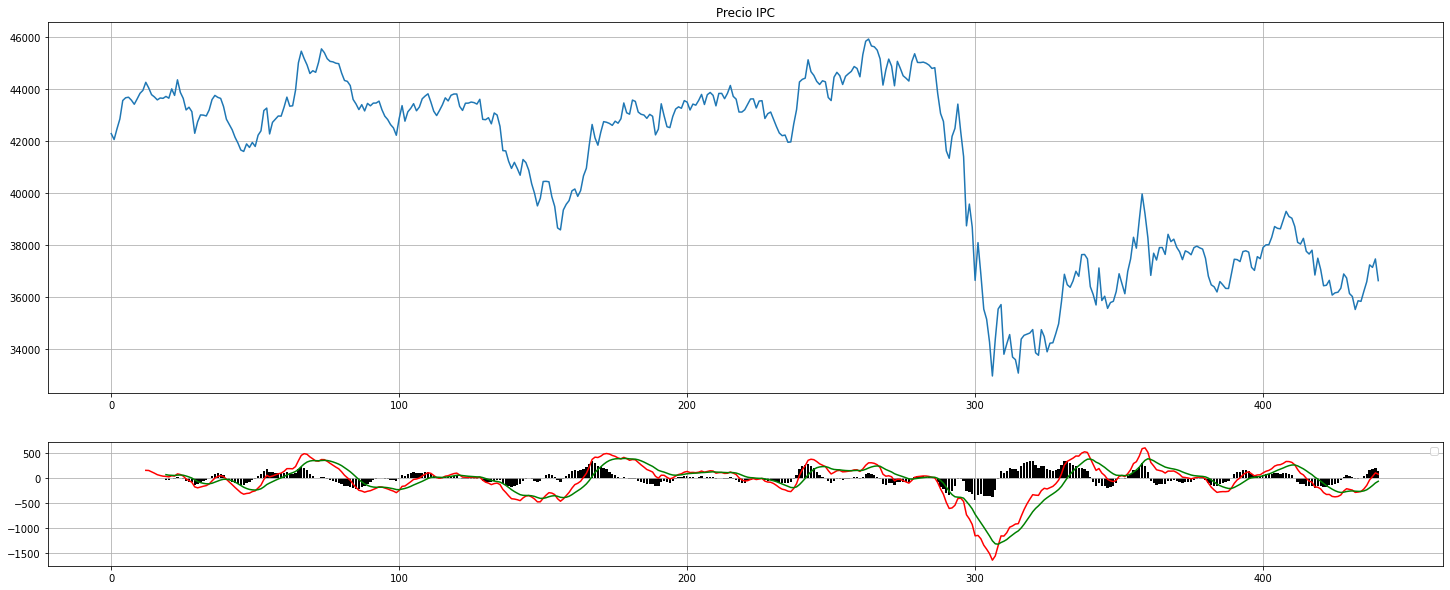

In [ ]:
df = MACD(ipc,8,14)
x = range(len(df.index))
fig = plt.figure(figsize=(25,10))
gs = gridspec.GridSpec(2,1,figure = fig, height_ratios=[3,1])
ax1 = plt.subplot(gs[0])
plt.plot(x, df.Close)
plt.grid(True)
plt.title('Precio IPC')
ax2 = plt.subplot(gs[1], sharex = ax1)
plt.plot(x, df.MACD_8_14, color='r')
plt.plot(x, df.MACDsign_8_14, color='g')
plt.bar(x, df.MACDdiff_8_14, color='k')
plt.legend()
plt.grid(True)
plt.show()

##RSI - Relative Strength Index

In [ ]:
def RSI(df, n):
  i = 0
  UpI = [0]
  DoI = [0]
  df = df.reset_index()
  while i + 1 <= df.index[-1]:
    UpMove = df.at[i+1,'High'] - df.at[i,'High']
    DoMove = df.at[i,'Low'] - df.at[i+1,'Low']
    if UpMove > DoMove and UpMove > 0:
      UpD = UpMove
    else: UpD = 0
    UpI.append(UpD)
    if DoMove > UpMove and DoMove > 0:
      DoD = DoMove
    else: DoD = 0
    DoI.append(DoD)
    i = i + 1
  UpI = pd.Series(UpI)
  DoI = pd.Series(DoI)
  PosDI = pd.Series(pd.Series.ewm(UpI, span = n, min_periods = n-1).mean())
  NegDI = pd.Series(pd.Series.ewm(DoI, span = n, min_periods = n-1).mean())
  RSI = pd.Series(PosDI / (PosDI + NegDI), name = 'RSI_' + str(n))
  df = df.join(RSI)
  df.set_index('Date', inplace=True)
  return df

No handles with labels found to put in legend.


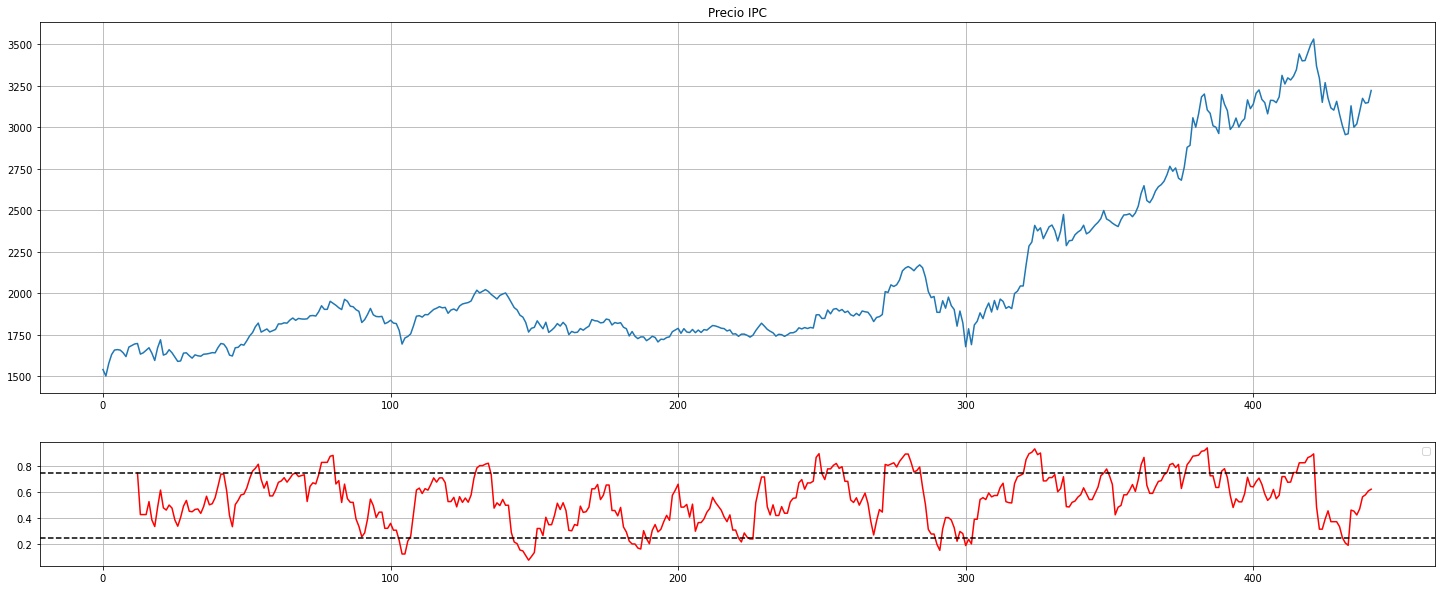

In [ ]:
df = RSI(ipc,14)
x = range(len(df.index))
fig = plt.figure(figsize=(25,10))
gs = gridspec.GridSpec(2,1,figure = fig, height_ratios=[3,1])
ax1 = plt.subplot(gs[0])
plt.plot(x, df.Close)
plt.grid(True)
plt.title('Precio IPC')
ax2 = plt.subplot(gs[1], sharex = ax1)
plt.plot(x, df.RSI_14, color='r')
plt.axhline(y=0.75, color='k', linestyle='--')
plt.axhline(y=0.25, color='k', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


This section follows exercises from Youtube Channel:
#ALGORITMOS DE BOLSA Ytube channel
https://www.youtube.com/channel/UC3gH5UiQz7EN1eGlkNeFNQw

Y su Curso de Iniciación al Trading algorítmico

##Cómo Dibujar Gráficos de Velas en Python

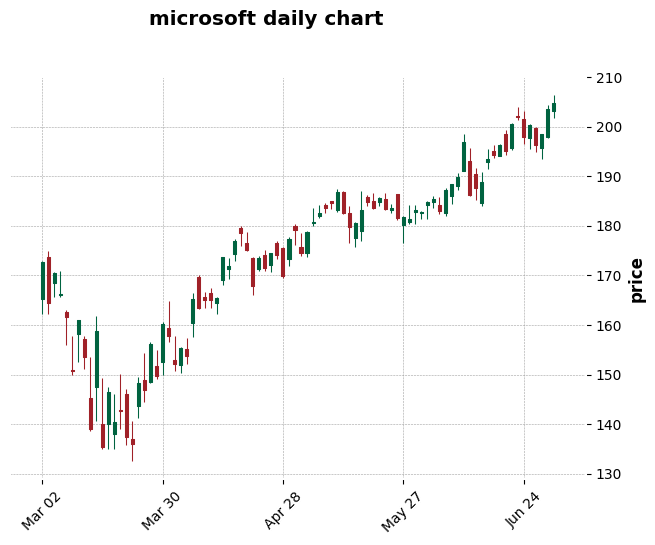

In [ ]:
import pandas_datareader.data as web
import datetime as dt
import mplfinance as mpf

start = dt.datetime(2020,3,1)
end = dt.datetime(2020,7,1)
df = web.DataReader('MSFT', 'yahoo', start, end)
mpf.plot(df,type='candle',style='charles',title='microsoft daily chart',ylabel='price')

##Cómo Crear tu Primera Estrategia de Trading y evaluarla

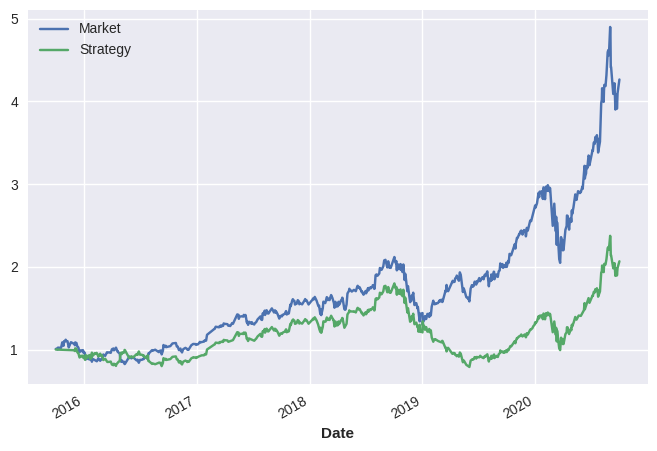

In [ ]:
import pandas_datareader.data as web
import datetime as dt
from numpy import where

start = dt.datetime(2015,10,1)
end = dt.datetime(2020,10,1)
df = web.DataReader('AAPL', 'yahoo', start, end)

df['42ma'] = df['Close'].rolling(window=42,min_periods=0).mean()
df['252ma'] = df['Close'].rolling(window=252,min_periods=0).mean()
df['diferencia'] = df['42ma'] - df['252ma']
df['Regime'] = where(df['diferencia']>0,1,0)
df['Regime'] = where(df['diferencia']<0,-1,df['Regime'])

#df[['Close','42ma','252ma']].plot(grid=True)

df['Market'] = df['Close']/df['Close'].shift(1)
df['Strategy'] = df['Market']**df['Regime'].shift(1)
df[['Market','Strategy']].cumprod().plot(grid=True)

##001 Cómo Crear tu Sistema de Trading Completo en PYTHON

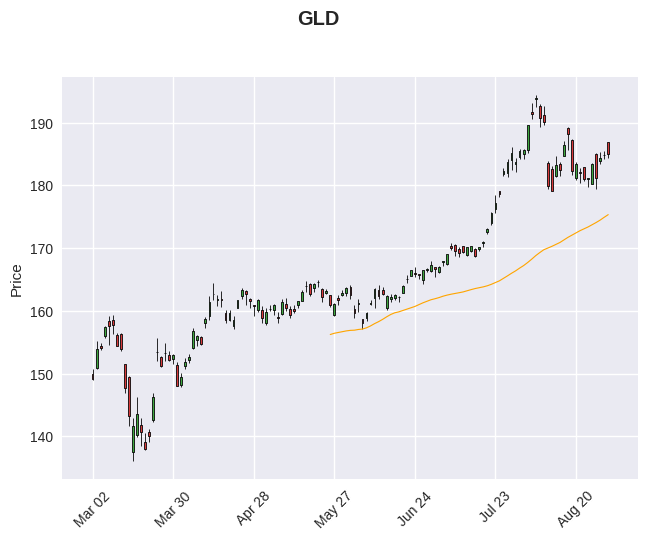

In [ ]:
from pandas_datareader. data import DataReader
from datetime import datetime
import mplfinance as mpf

start = datetime(2020,3,1)
end = datetime(2020,9,1)
df = DataReader( 'GLD' , 'yahoo' , start,end)
df['ma'] = df['Close'].rolling(window=10,min_periods=0).mean()
mc = mpf.make_marketcolors(up='tab:green' , down='tab:red') 
s = mpf.make_mpf_style(base_mpl_style="seaborn", mavcolors=["orange"],marketcolors=mc)
mpf.plot(df, type='candle',style=s,mav=20, title='GLD')

##002 Cómo Programar tu Estrategia de REVERSIÓN A LA MEDIA

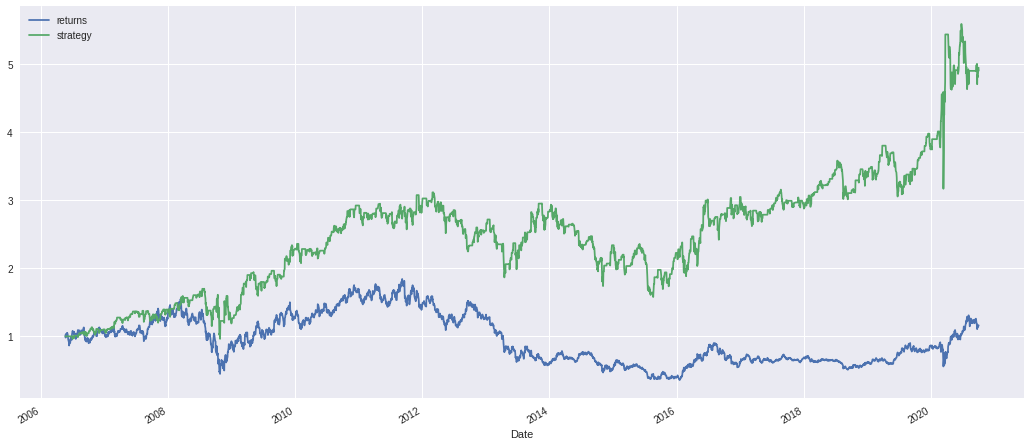

In [ ]:
from pandas_datareader.data import DataReader
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

start = datetime(2000,10,1)
end = datetime(2020,10,1)
data = DataReader('GDX', 'yahoo', start, end)
data['price'] = data['Adj Close']
SMA = 25
data['SMA'] = data['price'].rolling(window=SMA).mean()
N = 1
data['STD'] = N*data['price'].rolling(window=SMA).std()
data ['SMA+STD'] = data['SMA'] + data['STD']
data ['SMA-STD'] = data['SMA'] - data['STD']
plt.style.use('seaborn')
#data[['price','SMA+STD','SMA-STD']].plot(figsize=(24,6))
data['position'] = np.where(data['price'] > data['SMA+STD'], -1,0)
data['position'] = np.where(data['price'] < data['SMA-STD'], 1,data['position'])
data['position'] = data['position'].fillna(0)
data['returns'] = data['price'] /data['price'].shift(1)
data['strategy'] = data['returns']**data['position'].shift(1)
data[['returns', 'strategy']].dropna().cumprod().plot(figsize=(18,8))

##003 Cómo Crear un Sistema de Trading Tendencial en Python

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader.data import DataReader
from datetime import datetime

               High      Low      Open  ...  position   returns  strategy
Date                                    ...                              
2003-09-16  1.38400  1.37430  1.381400  ...       0.0       NaN       NaN
2003-09-17  1.38680  1.37470  1.380200  ...       0.0  1.003694  1.000000
2003-09-18  1.38650  1.36530  1.385600  ...       0.0  0.986362  1.000000
2003-09-21  1.36320  1.35020  1.356300  ...       0.0  0.989685  1.000000
2003-09-22  1.35970  1.34190  1.352700  ...       0.0  1.004361  1.000000
...             ...      ...       ...  ...       ...       ...       ...
2020-09-27  0.92943  0.92480  0.928220  ...       1.0  1.001478  1.001478
2020-09-28  0.92454  0.91923  0.923719  ...       1.0  0.995292  0.995292
2020-09-29  0.92429  0.91615  0.919380  ...       1.0  0.995345  0.995345
2020-09-30  0.92137  0.91630  0.920700  ...       1.0  1.001370  1.001370
2020-10-01  0.92171  0.91800  0.918700  ...       1.0  0.998132  0.998132

[4432 rows x 12 columns]


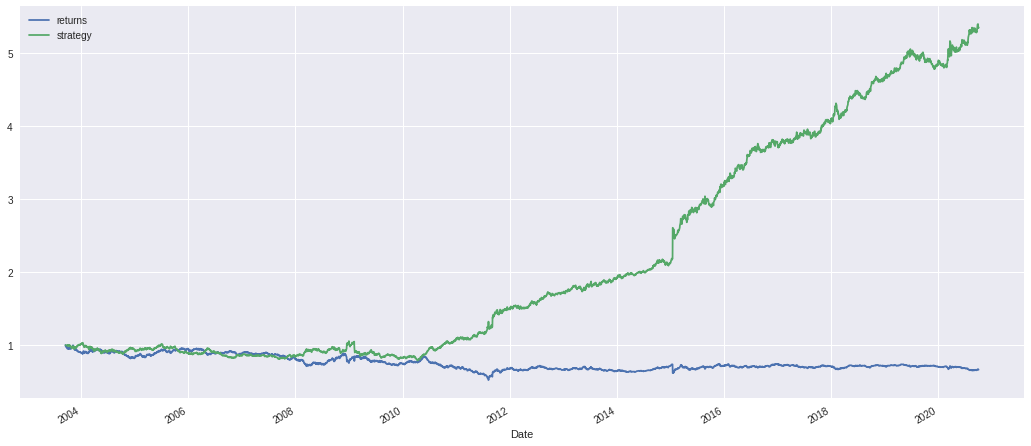

In [ ]:
start = datetime(2000,10,1)
end = datetime(2020,10,1)
df = DataReader('USDCHF=X', 'yahoo', start, end)

window = 10
df['highest high'] = df['High'].rolling(window=window).max()
df['lowest low'] = df['Low'].rolling(window=window).min()

df['trigger'] = np.where(df['High'] == df['highest high'],1,np.nan)
df['trigger'] = np.where(df['Low'] == df['lowest low'],-1,df['trigger'])
df['position'] = df['trigger'].ffill().fillna(0)

df['returns'] = df['Adj Close'] / df['Adj Close'].shift(1)
df['strategy'] = df['returns'] ** df['position'].shift(1)

plt.style.use('seaborn')
df[['returns', 'strategy']].dropna().cumprod().plot(figsize=(18,8))
print(df)

# Part time Larry Ytube channel
https://www.youtube.com/channel/UCY2ifv8iH1Dsgjrz-h3lWLQ

##Candlestick Pattern Recognition with Python and TA-Lib
https://youtu.be/QGkf2-caXmc

as talib library cannot be installed here, 
you need to copy this code  and run it in your own local IDE

to install it:
https://blog.quantinsti.com/install-ta-lib-python/

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import talib
import pandas as pd

data = yf.download('BTC-USD', start="2015-01-01", end="2020-10-1")
data['pattern_morningstar'] = talib.CDLMORNINGSTAR(data.Open, data.High, data.Low, data.Close)
#print(data)
print(data[data['pattern_morningstar'] != 0])

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,159.352386,22622100
2020-01-03,158.320007,159.949997,158.059998,158.619995,157.368179,21116200
2020-01-06,157.080002,159.100006,156.509995,159.029999,157.774948,20813700
2020-01-07,159.320007,159.669998,157.320007,157.580002,156.336395,21634100
2020-01-08,158.929993,160.800003,157.949997,160.089996,158.826569,27746500
...,...,...,...,...,...,...
2020-09-24,199.850006,205.570007,199.199997,203.190002,203.190002,31202500
2020-09-25,203.550003,209.039993,202.539993,207.820007,207.820007,29437300
2020-09-28,210.880005,212.570007,208.059998,209.440002,209.440002,32004900


##Algorithmic Trading with Python and Backtrader
https://youtu.be/5VU3CJMuk0w


In [ ]:
pip install backtrader

###First strategy

In [ ]:
import backtrader as bt

class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.order = None
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED {}'.format(order.executed.price))
            elif order.issell():
                self.log('SELL EXECUTED {}'.format(order.executed.price))
            self.bar_executed = len(self)
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        if self.order:
            return
        if not self.position:
            if self.dataclose[0] < self.dataclose[-1]:
                #close lower than previous close
                if self.dataclose[-1] < self.dataclose[-2]:
                    #previous close lower than 2 bars previous

                    #set a BUY
                    self.log('BUY CREATE, %.2f' % self.dataclose[0])
                    self.order = self.buy()
        else:
            if len(self) >= (self.bar_executed + 5):
                self.log('SELL CREATE {}'.format(self.dataclose[0]))
                self.order = self.sell()

In [ ]:
import backtrader as bt
import datetime as dt
import pandas as pd
import pandas_datareader.data as pdr

#importing my own code above
#from strategies import TestStrategy

#backtrader data setup s
cerebro = bt.Cerebro()
cerebro.broker.set_cash(1000000)
data = bt.feeds.YahooFinanceCSVData(
    #download any csv historiical price from yahoo finance
    dataname = '/TUP.csv',
    fromdate=dt.datetime(2019,12,1),
    todate=dt.datetime(2020,8,1),
    reverse=False
)
cerebro.adddata(data)

#
cerebro.addstrategy(TestStrategy)
cerebro.addsizer(bt.sizers.FixedSize, stake=1000)

#running backtrader cerebro
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()
#to plot correctly you need to get this version:
#pip3 install matplotlib==3.2.1
# and run it in your own IDE

###second strategy

In [ ]:
import math
import backtrader as bt

class GoldenCross(bt.Strategy):
    params = (('fast', 50), ('slow',200), ('order_percentage', 0.95), ('ticker', 'X'))
    
    def __init__(self):
        self.fast_moving_average = bt.indicators.SMA(
            self.data.close, period =self.params.fast, plotname='50 day MA'
        )
        self.slow_moving_average = bt.indicators.SMA(
            self.data.close, period = self.params.slow, plotname='200 day MA'
        )
        self.crossover = bt.indicators.CrossOver(self.fast_moving_average, self.slow_moving_average)

    def next(self):
        if self.position.size == 0:
            if self.crossover > 0:
                amount_to_invest = (self.params.order_percentage * self.broker.cash)
                self.size = math.floor(amount_to_invest / self.data.close)

                print("Buy {} shares of {} at {} ".format(self.size, self.params.ticker, self.data.close[0]))

                self.buy(size=self.size)

        if self.position.size >0:
            if self.crossover < 0:
                print('Sell {} shares of {} at {} '.format(self.size, self.params.ticker, self.data.close[0]))
                self.close()

###3rd strategy

In [ ]:
import backtrader as bt

class BuyHold(bt.Strategy):

    def next(self):
        size = int(self.broker.getcash() / self.data)
        self.buy(size=size)

###execution

In [ ]:
import os, sys, argparse
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt
import backtrader as bt

#importing my strategies from other files
#from strategies import TestStrategy
#from GoldenCross import GoldenCross
#from BuyHold import BuyHold

#this is for selecting the strategy
"""
strategies = {
    "golden_cross": GoldenCross,
    "buy_hold": BuyHold,
    "test": TestStrategy
}
parser = argparse.ArgumentParser()
parser.add_argument("strategy", help="which strategy to run", type=str)
args = parser.parse_args()

if not args.strategy in strategies:
    print("invalid strategie, must be one of {}".format(strategies.keys()))
    sys.exit()
"""
#data inputs
symbol = 'SPY'
n_months = 84
#data download
n_days = dt.timedelta(days=(int(n_months*30)))
end = dt.date.today()
start = end - n_days
df = pdr.DataReader(symbol, 'yahoo', start, end)

cerebro = bt.Cerebro()
cerebro.broker.setcash(1000000)
feed = bt.feeds.PandasData(dataname=df)
cerebro.adddata(feed)
#next you can input the strategy you want to test
cerebro.addstrategy(GoldenCross)
#cerebro.addstrategy(strategies[args.strategy])
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()
#to plot correctly you need to get this version:
#pip3 install matplotlib==3.2.1
# and run it in your own IDE

Starting Portfolio Value: 1000000.00
Buy 4637 shares of X at 204.86000061035156 
Sell 4637 shares of X at 192.11000061035156 
Buy 4364 shares of X at 208.61000061035156 
Sell 4364 shares of X at 263.57000732421875 
Buy 3973 shares of X at 285.8299865722656 
Sell 3973 shares of X at 261.6499938964844 
Buy 3306 shares of X at 314.3800048828125 
Final Portfolio Value: 1134795.32


[[<Figure size 432x288 with 5 Axes>]]

##Alpaca Market Data API
https://youtu.be/ZnOviHSHQtg

In [ ]:
pip install websocket-client

In [ ]:
#this is config.py

endpoint = 'https://paper-api.alpaca.markets'
API_KEY = 'PKEFKEI92KZ0L4JBU3M5'
SECRET_KEY = 'NTvRtM2tkNXGblwgvUm5qU6dC463zt57s9H5rM9F'
HEADERS = {
    'APCA-API-SECRET-KEY': API_KEY,
    'APCA-API-SECRET-KEY': SECRET_KEY
}
BARS_URL = 'https://data.alpaca.markets/v1/bars'

In [ ]:
#this is stream.py 

#import config
import websocket, json

def on_open(ws):
    print("opened")
    auth_data = {
        "action": "authenticate",
        "data": {"key_id": API_KEY,"secret_key": SECRET_KEY}
    }

    ws.send(json.dumps(auth_data))

    listen_message = {"action":"listen","data":{"streams":["T.SPY","MA.AAPL"]}}
    ws.send(json.dumps(listen_message))

def on_message(ws, message):
    print("received a message")
    print(message)

socket = "wss://data.alpaca.markets/stream"
ws = websocket.WebSocketApp(socket, on_open=on_open, on_message=on_message)#, on_close=on_close)
ws.run_forever()


In [ ]:
# this is bars.py

import config, requests, json
import datetime as dt

holdings = open('data\QQQ.csv').readlines()
symbols = [holding.split(',')[2].strip() for holding in holdings][1:]
symbols = ",".join(symbols)
limit_bars = 1000

minute_bars_url = config.BARS_URL + '/5Min?symbols=MSFT&limit=' + str(limit_bars)
day_bars_url = '{}/day?symbols={}&limit='.format(config.BARS_URL, symbols, str(limit_bars))
r = requests.get(day_bars_url, headers=config.HEADERS)

data = r.json()
#print(json.dumps(r.json(), indent=4))

# type in the console:
# python bars.py > output.txt

for symbol in data:
    filename = 'data/ohlc/{}.txt'.format(symbol)
    x = open(filename, 'w+')
    x.write('Date,Open,High,Low,Close,Volume,OpenInterest\n')
    for bar in data[symbol]:
        #t = dt.datetime.fromtimestamp(bar['t'])
        #day = t.strftime('%Y-%m-%d')
        line = '{},{},{},{},{},{},{}\n'.format(bar['t'],bar['o'],bar['h'],bar['l'],bar['c'],bar['v'], 0.00)
        x.write(line)

In [ ]:
#this is ta.py

import btalib
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt

df = pdr.DataReader('BTC-USD','yahoo', start=(dt.datetime(2020,1,1)),end=(dt.datetime(2020,10,1)))
#df = pd.read_csv('data/ohlc/AAPL.csv', parse_dates=True, index_col='Date')

sma = btalib.sma(df, period=50)
df['sma'] =sma.df

rsi = btalib.rsi(df)
df['rsi'] =rsi.df

print(df)